# **Data Cleaning and EDA on Flight Price Dataset**:

The dataset is taken from -
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

### FEATURES
The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

# Read the data

In [1]:
# mount the drive to easily access the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import some basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
# read the excel data
flight_data = pd.read_excel("/content/drive/MyDrive/EDA and Feature Engineering/flight_price.xlsx")
flight_data.shape

(10683, 11)

In [22]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# *Now, lets move on to the EDA for the cleaned data*

In [24]:
flight_data.shape

(10683, 11)

In [25]:
flight_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Lets start with basic checks for the EDA

1. check for missing values

2. check for duplicates

3. check if the datatype is correct for all the features

4. check number of unique values for each column

5. check for statistics



In [26]:
# missing values
flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Insights

* There is only one missing value for Route and Total stops.

* We will deal with this when we look at the feature in depth in FE

In [27]:
# check for dupliactes
flight_data[flight_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


Insights
* Here we cannot drop the duplicates, as they contain some important information, like same route flights on different days.

In [8]:
# check the dtypes
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Insights

* The datatypes are not correct for all the features

* Example, the time, total stops must be numerical, lets look at them in feature Engineering.

In [9]:
# lets look at the unique
flight_data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [11]:
# lets look at the stats
flight_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Insights

* We see stats for only one feature, later after the datatypes are corrected we can see the stats for all numerical columns

In [20]:
# lets look at the correlation plot now
flight_data.corr()

<ipython-input-20-6fec245853b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  flight_data.corr()


,Price
Price,1.0


Insights

* Now we canno look at the correlation plot right now, as there is only one single numerical feature.

* After some cleaning and feature engineering, we will be able to see this.

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

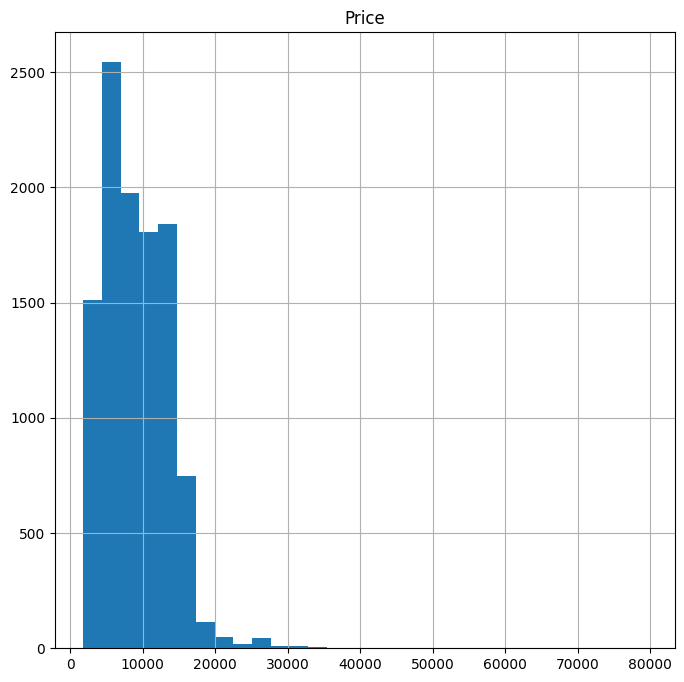

In [14]:
# lets see the distribution for all the columns in the dataset
flight_data.hist(bins = 30, figsize=(8,8))

<Axes: xlabel='Airline', ylabel='Price'>

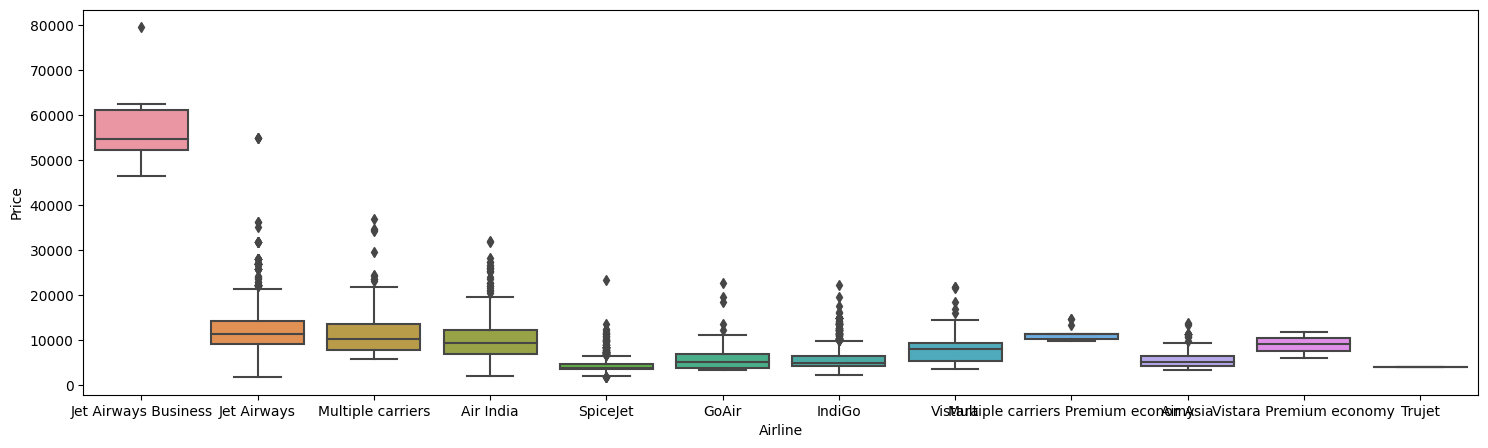

In [16]:
# lets see now, the effect of airline wrt the price
plt.figure(figsize=(18,5))
sns.boxplot(x='Airline',y='Price', data=flight_data.sort_values('Price', ascending=False))

Insights

* From the above boxplot we can see that, only Jet Airways have the higher price values.

* Apart from that almost all the other airlines have same median prices.

<Axes: xlabel='Total_Stops', ylabel='Price'>

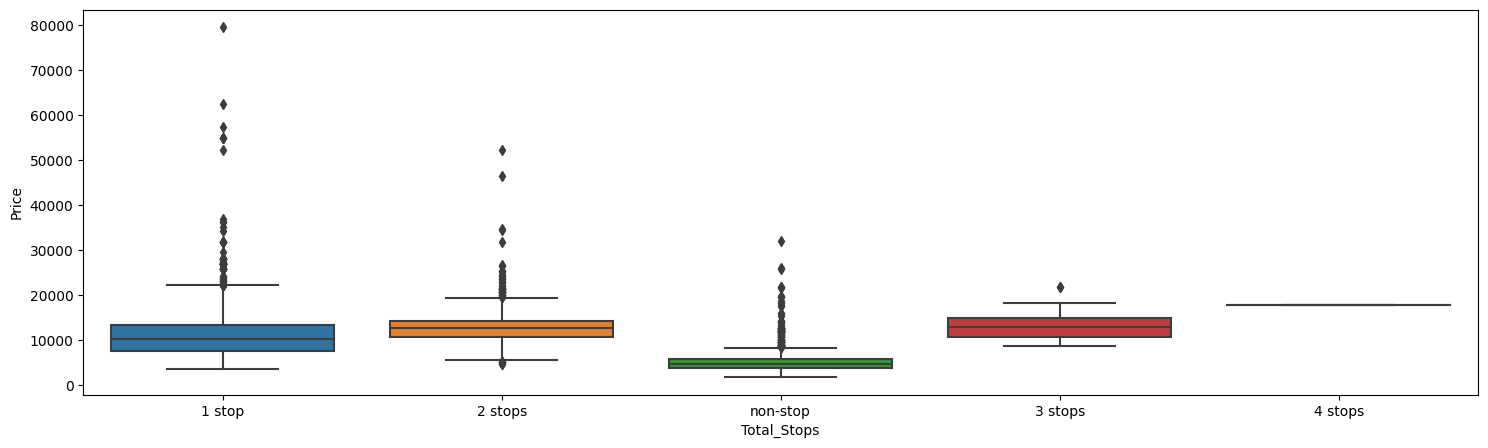

In [17]:
# lets see now, the effect of total stops wrt the price
plt.figure(figsize=(18,5))
sns.boxplot(x='Total_Stops',y='Price', data=flight_data.sort_values('Price', ascending=False))

Insights
* We can see that for 2 and 3 stops the price is greater comapred to other stops

# *Lets do some feature Engineering*

The date of journey column is object datatype. Lets convert this date into seperate day, month and year for better analysis.

In [28]:
# lets do FE on date now, we will seperate the values based on the seperator
flight_data['Date_of_Journey'].str.split('/')

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [29]:
# create a new column for day
flight_data['day_of_journey']=flight_data['Date_of_Journey'].str.split('/').str[0]

In [30]:
# create a new column for month
flight_data['month_of_journey']=flight_data['Date_of_Journey'].str.split('/').str[1]

In [31]:
# create a new column for year
flight_data['year_of_journey']=flight_data['Date_of_Journey'].str.split('/').str[2]
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [32]:
# now the new created faetures are still object datatype, lets convert them into numeric so we can use them in our analysis
flight_data['day_of_journey'] = flight_data['day_of_journey'].astype(int)
flight_data['month_of_journey'] = flight_data['month_of_journey'].astype(int)
flight_data['year_of_journey'] = flight_data['year_of_journey'].astype(int)

In [33]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Date_of_Journey   10683 non-null  object
 2   Source            10683 non-null  object
 3   Destination       10683 non-null  object
 4   Route             10682 non-null  object
 5   Dep_Time          10683 non-null  object
 6   Arrival_Time      10683 non-null  object
 7   Duration          10683 non-null  object
 8   Total_Stops       10682 non-null  object
 9   Additional_Info   10683 non-null  object
 10  Price             10683 non-null  int64 
 11  day_of_journey    10683 non-null  int64 
 12  month_of_journey  10683 non-null  int64 
 13  year_of_journey   10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [34]:
# now lets drop the date_of_joruney column
flight_data.drop('Date_of_Journey', axis=1, inplace = True)
flight_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


Now, lets look at the arrival time column. It has the time in hours and minutes and some values have month.
We dont need the month info again, rather we can have two columns for arrival that stores hour and minutes seperately. Lets do that.

In [35]:
# first lets just take the time element
flight_data['Arrival_Time'] = flight_data['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [36]:
flight_data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019


In [37]:
flight_data['Arrival_Hour'] = flight_data['Arrival_Time'].str.split(':').str[0]
flight_data['Arrival_Min'] = flight_data['Arrival_Time'].str.split(':').str[1]

In [38]:
flight_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [39]:
flight_data.drop('Arrival_Time', axis = 1, inplace=True)
flight_data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,04,25


In [40]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Dep_Time          10683 non-null  object
 5   Duration          10683 non-null  object
 6   Total_Stops       10682 non-null  object
 7   Additional_Info   10683 non-null  object
 8   Price             10683 non-null  int64 
 9   day_of_journey    10683 non-null  int64 
 10  month_of_journey  10683 non-null  int64 
 11  year_of_journey   10683 non-null  int64 
 12  Arrival_Hour      10683 non-null  object
 13  Arrival_Min       10683 non-null  object
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [41]:
# lets again convert the arrival min and hour to int
flight_data['Arrival_Hour']=flight_data['Arrival_Hour'].astype(int)
flight_data['Arrival_Min']=flight_data['Arrival_Min'].astype(int)

flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Dep_Time          10683 non-null  object
 5   Duration          10683 non-null  object
 6   Total_Stops       10682 non-null  object
 7   Additional_Info   10683 non-null  object
 8   Price             10683 non-null  int64 
 9   day_of_journey    10683 non-null  int64 
 10  month_of_journey  10683 non-null  int64 
 11  year_of_journey   10683 non-null  int64 
 12  Arrival_Hour      10683 non-null  int64 
 13  Arrival_Min       10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


**Similarly work with departure time**

In [42]:
# just to be safe that there is no additional info with time again, we will do split again
flight_data['Dep_Time']=flight_data['Dep_Time'].apply(lambda x : x.split(' ')[0])
flight_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [43]:
# now lets craete two more colummns, for dep hour and dep min
flight_data['Dep_Hour'] = flight_data['Dep_Time'].str.split(':').str[0]
flight_data['Dep_Min']  = flight_data['Dep_Time'].str.split(':').str[1]
flight_data.drop('Dep_Time', axis=1, inplace=True)
flight_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,09,25


In [44]:
flight_data['Dep_Hour']=flight_data['Dep_Hour'].astype(int)
flight_data['Dep_Min']=flight_data['Dep_Min'].astype(int)

flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10683 non-null  object
 5   Total_Stops       10682 non-null  object
 6   Additional_Info   10683 non-null  object
 7   Price             10683 non-null  int64 
 8   day_of_journey    10683 non-null  int64 
 9   month_of_journey  10683 non-null  int64 
 10  year_of_journey   10683 non-null  int64 
 11  Arrival_Hour      10683 non-null  int64 
 12  Arrival_Min       10683 non-null  int64 
 13  Dep_Hour          10683 non-null  int64 
 14  Dep_Min           10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


**Now, the next column to apply FE is the Duration Feature**

In [45]:
# create duration hour column first
flight_data['Duration_Hour']=flight_data['Duration'].str.split(' ').str[0].str.split('h').str[0]
flight_data['Duration_Hour']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_Hour, Length: 10683, dtype: object

In [46]:
# create duration minute column
flight_data['Duration_Hour']=flight_data['Duration_Hour'].str.split('m').str[0]
flight_data['Duration_Hour']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_Hour, Length: 10683, dtype: object

In [47]:
# create duration minute column
flight_data['Duration_Min']=flight_data['Duration'].str.split(' ').str[1].str.split('m').str[0]
flight_data['Duration_Min']

0         50
1         25
2        NaN
3         25
4         45
        ... 
10678     30
10679     35
10680    NaN
10681     40
10682     20
Name: Duration_Min, Length: 10683, dtype: object

In [48]:
flight_data['Duration_Hour']=flight_data['Duration_Hour'].astype(int)

In [49]:
flight_data['Duration_Min'].fillna(0, inplace=True)

In [53]:
flight_data['Duration_Min']=flight_data['Duration_Min'].astype(int)

In [54]:
flight_data['Duration_Min'].isnull().sum()

0

In [55]:
flight_data['Duration_Total_Mins'] = flight_data['Duration_Min'] + (flight_data['Duration_Hour']*60)
flight_data['Duration_Total_Mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_Total_Mins, Length: 10683, dtype: int64

In [56]:
flight_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min,Duration_Total_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45,285


In [57]:
flight_data.drop(['Duration','Duration_Hour', 'Duration_Min'], axis=1, inplace=True)
flight_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Total_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,21,35,16,50,285


**Lets now look into a categorical column i.e Total stops**

In [58]:
flight_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [59]:
flight_data['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [60]:
flight_data['Total_Stops'].isnull().sum()

1

Insights
* Only 1 record is there so wecan drop this, but istead lets do data
imputation we will replace nan with 1, as the maximun no of stops is 1

* Now we also we to convert this categorical column into a numerical one. So lets use map fucntion to assign label values.


In [61]:
flight_data['Total_Stops']=flight_data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [62]:
flight_data[flight_data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Total_Mins


In [63]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10683 non-null  object
 1   Source               10683 non-null  object
 2   Destination          10683 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10683 non-null  int64 
 5   Additional_Info      10683 non-null  object
 6   Price                10683 non-null  int64 
 7   day_of_journey       10683 non-null  int64 
 8   month_of_journey     10683 non-null  int64 
 9   year_of_journey      10683 non-null  int64 
 10  Arrival_Hour         10683 non-null  int64 
 11  Arrival_Min          10683 non-null  int64 
 12  Dep_Hour             10683 non-null  int64 
 13  Dep_Min              10683 non-null  int64 
 14  Duration_Total_Mins  10683 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


**Lets look into the Route column now**

Here, we can directly drop this feature as we have the source and destination features

In [64]:
flight_data.drop('Route', axis = 1, inplace=True)
flight_data.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Total_Mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,1140


In [65]:
flight_data.to_csv("/content/drive/MyDrive/EDA and Feature Engineering/cleaned_flight_data.csv", index=True)

**Lets now look into Airline,Additional_Info	 Source and Destination**


In [66]:
flight_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

Now this is a categorical column on which we can apply encoding, lets apply one hot encoding

In [67]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [68]:
encoding_array = encoder.fit_transform(flight_data[['Airline', 'Additional_Info', 'Source', 'Destination']]).toarray()
encoding_array

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [70]:
# finally lets convert these into a dataframe
new_dt = pd.DataFrame(encoding_array, columns=encoder.get_feature_names_out())
new_dt.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [71]:
new_dt.to_csv("/content/drive/MyDrive/EDA and Feature Engineering/cleaned_categorical_flight_data.csv", index=True)

Conclusion -

* We can concatenate these columns into the main data file and drop the original 4 columns.

In [72]:
# lets look at the correlation plot now
flight_data.corr()

<ipython-input-72-6fec245853b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  flight_data.corr()


,Total_Stops,Price,day_of_journey,month_of_journey,year_of_journey,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Total_Mins
Total_Stops,1.000000,0.603883,-0.009472,0.054389,NaN,0.038123,-0.106939,-0.061490,-0.002591,0.738158
Price,0.603883,1.000000,-0.153738,-0.103651,NaN,0.024264,-0.086155,0.006819,-0.024492,0.506495
day_of_journey,-0.009472,-0.153738,1.000000,-0.038378,NaN,-0.003192,-0.017511,0.002220,-0.008261,-0.022612
month_of_journey,0.054389,-0.103651,-0.038378,1.000000,NaN,-0.003941,-0.100626,0.039112,-0.059238,0.014791
year_of_journey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Hour,0.038123,0.024264,-0.003192,-0.003941,NaN,1.000000,-0.154362,0.005215,0.043054,0.051458
Arrival_Min,-0.106939,-0.086155,-0.017511,-0.100626,NaN,-0.154362,1.000000,0.067909,-0.017594,-0.069557
Dep_Hour,-0.061490,0.006819,0.002220,0.039112,NaN,0.005215,0.067909,1.000000,-0.024806,0.002035
Dep_Min,-0.002591,-0.024492,-0.008261,-0.059238,NaN,0.043054,-0.017594,-0.024806,1.000000,-0.018865
Duration_Total_Mins,0.738158,0.506495,-0.022612,0.014791,NaN,0.051458,-0.069557,0.002035,-0.018865,1.000000


<ipython-input-73-2df130445dde>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(flight_data.corr(), annot = True)


<Axes: >

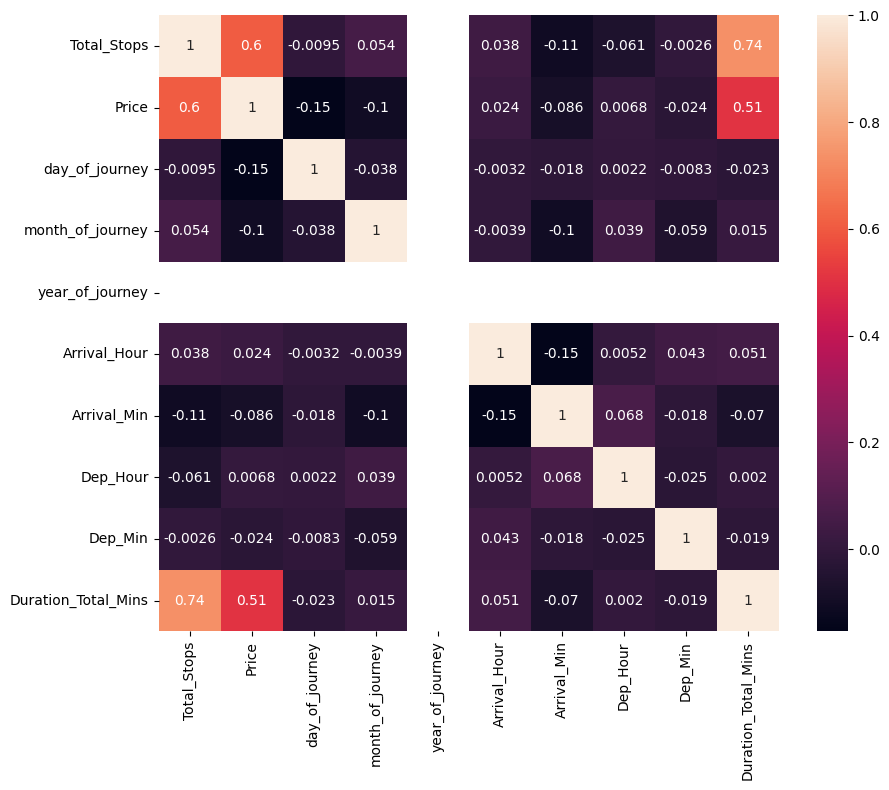

In [73]:
plt.figure(figsize = (10,8))
sns.heatmap(flight_data.corr(), annot = True)

Insights

* We can here clearly see the correlation between all the numerical features now.